Task 1: ANOVA

F-statistic: 88.40700569201455
P-value: 0.0
Means of each Make:
Mean price for Toyota: $32824.63
Mean price for Ford: $32911.84
Mean price for RAM: $50997.57
Mean price for Honda: $32206.67
Mean price for Lexus: $41986.65
Mean price for Mercedes-Benz: $49222.68
Mean price for Dodge: $39266.96
Mean price for Subaru: $28894.34
Mean price for Acura: $35712.40
Mean price for BMW: $45068.83
Mean price for Audi: $47654.89
Mean price for Volvo: $40547.91
Mean price for Lincoln: $41884.04
Mean price for Land: $61191.62
Mean price for Chevrolet: $35827.93
Mean price for INFINITI: $37008.97
Mean price for Tesla: $67660.38
Mean price for Jeep: $35120.70
Mean price for Chrysler: $24875.44
Mean price for Mazda: $28626.66
Mean price for Kia: $30472.75
Mean price for Volkswagen: $30145.16
Mean price for Porsche: $79365.90
Mean price for Nissan: $26694.30
Mean price for Hyundai: $30382.67
Mean price for GMC: $50083.53
Mean price for Buick: $27257.29
Mean price for Genesis: $50802.38
Mean price for Cad

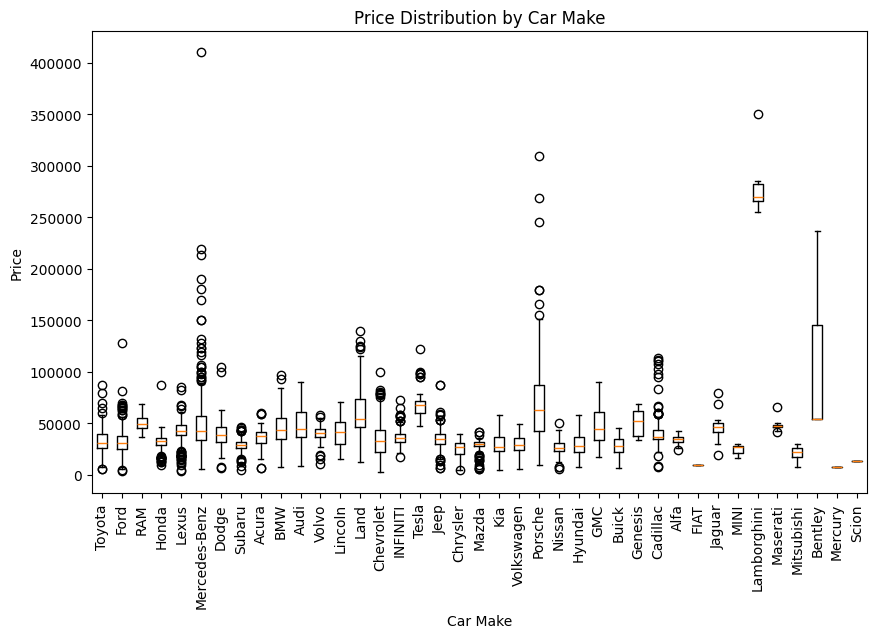

In [19]:
#Import libraries 
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Import csv file
data = pd.read_csv('cars_raw.csv')

# Group the data by 'Make' then retrive Price for each make
make_groups = [data['Price'][data['Make'] == make] for make in data['Make'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*make_groups)

# Print out F-stats and P-value
print("F-statistic:", f_statistic)
print("P-value:", p_value)

print("Means of each Make:")
# Calculate and print the mean of each group
for make, group in zip(data['Make'].unique(), make_groups):
    mean_price = group.mean()
    print(f"Mean price for {make}: ${mean_price:.2f}")

# Plot a box plot to show all of the car makes
plt.figure(figsize=(10, 6))
plt.boxplot(make_groups, labels=data['Make'].unique())
plt.title("Price Distribution by Car Make")
plt.xlabel("Car Make")
plt.ylabel("Price")
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


The F-statistic of 88.41 and a P-value of 0.0 indicate that there are significant differences in car prices among different car makes. The least one car make has a significantly different average price compared to the others, as the P-value is very close to zero. The car make variable is a statistically significant factor in explaining variations in car prices.

Task 2: Linear Regression

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     58.30
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.68e-14
Time:                        22:27:28   Log-Likelihood:                -56973.
No. Observations:                4999   AIC:                         1.140e+05
Df Residuals:                    4997   BIC:                         1.140e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.348e+04   5630.657     14.

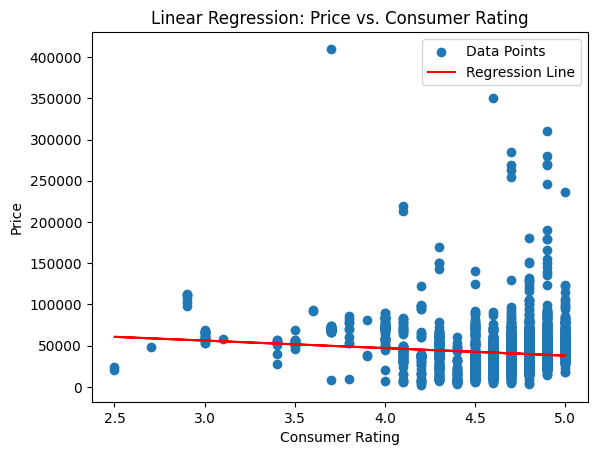

In [30]:
# Import Libraries 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Import CSV files
data = pd.read_csv('cars_raw.csv')

# Retrieve Price and Consumer Ratings
df = data[['Price', 'ConsumerRating']]

# Add Constant
X = sm.add_constant(df['ConsumerRating'])

# Create the linear regression model
model = sm.OLS(df['Price'], X).fit()
# Get a summary of the model
print(model.summary())
# Perform an F-test to evaluate the overall significance of the model
f_statistic = model.fvalue
p_value = model.f_pvalue

# Print out the f-stats and p-value
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Create a scatter plot
plt.scatter(df['ConsumerRating'], df['Price'], label="Data Points")
plt.plot(df['ConsumerRating'], model.fittedvalues, 'r', label="Regression Line")
plt.title("Linear Regression: Price vs. Consumer Rating")
plt.xlabel("Consumer Rating")
plt.ylabel("Price")
plt.legend()
plt.show()


The OLS model shows the important information about a linear regression model that aims to predict the Price of the cars based on the Consumer Rating. The R-squared value measure the proportion of the variance in the price variables that can be explained by the independent variable. Only about 1.2% of the variance in car prices can be explained by consumer ratings. The F-statistic is 58.30 and the p-value is 2.683416131054107e-14 which is very low. The results suggest that Consumer Rating has a statistically significant but relatively weak impact on predicting car prices. The low p-value indicated that it is statistically significant but the low R-squared value indicates that there are other factors not captured with the model that influence car prices. 

Task 3: Assumptions and Limitations

ANOVA assumptions: 
    - ANOVA assumes that the observations within each group are independent. Violating the assumption can lead to incorrect conclusions. It can inflate Type I error rate
        - Ensure data collection methods avoid dependencies between obsetvation
    - Another assumption is that the variances of the dependent variable are equal across all groups. Violating can lead to unreliable results and incorrect p-values
    - Assumption of Normality assumes that the residuals follow a normal distribution. Violation can affect the accuracy of p-values and confidence intervals

Linear Models Assumption:
    - Assumption that the relationship between independent and dependent variables is linear. If it is not, then it may provide inaccurate predictions
    - Like ANOVA, linear models assumes that errors are independent. Autocorrelation in residuals can lead to unreliable coefficient estimates
    - Assumption that constant variance of errors across all values of independent variables. This violation can result in inefficient coefficient estimates

Limitations: 
    - Both ANOVA and linear models may not capture complex, nonlinear relationships between variables
    - Correlation does not imply causation
    - Linear models can overfit data if too many independent variables are included leading to poor generatlization

Solution to address:
    - Homoscedasticity: Transform the dependent variables or use robust regression techniques
        - Utilizing robust regression methods with Python libraries statsmodel or scikit-learn

    - Nonlinearity: Utilizing polynomial regression, spline models, or nonlinear regression techniques
        - Utilize polynomial features or specilized regression models in Python for nonlinear relationships
    
    - Overfitting: Regularize linear models to prevent overfitting. Use feature selection techniques to choose relevant variables
        - Employ regularization techniques in scikit-learn



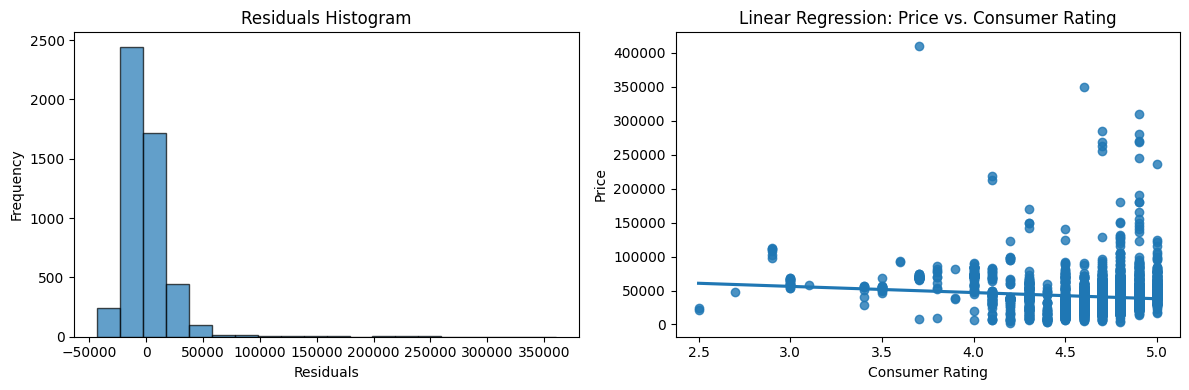

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     25.03
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           5.85e-07
Time:                        21:21:42   Log-Likelihood:                -56973.
No. Observations:                4999   AIC:                         1.140e+05
Df Residuals:                    4997   BIC:                         1.140e+05
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.348e+04   8648.245      9.

In [20]:
# Import Libraries
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

# Import CSV dile
data = pd.read_csv('cars_raw.csv')

# Retrieve Price and Consumer Ratings
df = data[['Price', 'ConsumerRating']]
# Build a linear regression model
X = sm.add_constant(df['ConsumerRating'])
model = sm.OLS(df['Price'], X).fit(cov_type='HC3')  # Use robust standard errors (HC3)

# Plot histogram to show residuals
residuals = model.resid
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Plot the line regression for the price and consumer rating
plt.subplot(1, 2, 2)
sns.regplot(x='ConsumerRating', y='Price', data=df, ci=None)
plt.title("Linear Regression: Price vs. Consumer Rating")
plt.xlabel("Consumer Rating")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# Print out the model
print(model.summary())

# Check for heteroscedasticity using the Breusch-Pagan test
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
print(dict(zip(name, bp_test)))


The output suggest that Consumer Rating has statistically significant but relatively weak impact on predicting car prices. The robust standard errors account for potential heteroscedasticity in the data, improving the reliability of the coefficient and hypothesis tests. F-stats is 25.03 and with a low p-value of 5.85e-07 indicating overall significance of the model. HC3 estimator is utilized to account for potential heteroscedasticity. The Lagrange Multiplier Stats show that there is an evidence of heteroscedasticity.

Task 4: Mini Project

Problem: The aim of the mini project is to analyze the Cars for sale dataset that contains information about car listings. The goal is to understand how different factors can affect the car prices.

Research Question: Are there significant differences in the means prices of cars across different categories based on factors like consumer ratings, car make, car year and mileage?

Assumptions and Limitations: 
    - Linearity Assumptions: Linear models assume linear relationship. Possible solution is using nonlinear regression techniques or polynomial features
    - Both ANOVA and linear models assume normally distributed residuals, which can affect hypothesis tests and confidence intervals. Possible solution can be transforming data or use non parametric tests when normality is not met
    - Assumption of constant variance of residuals may not hold, which leads to inefficient standard errors. Possible solution is using robust regression with heteroscedasticity-robust standard errors.


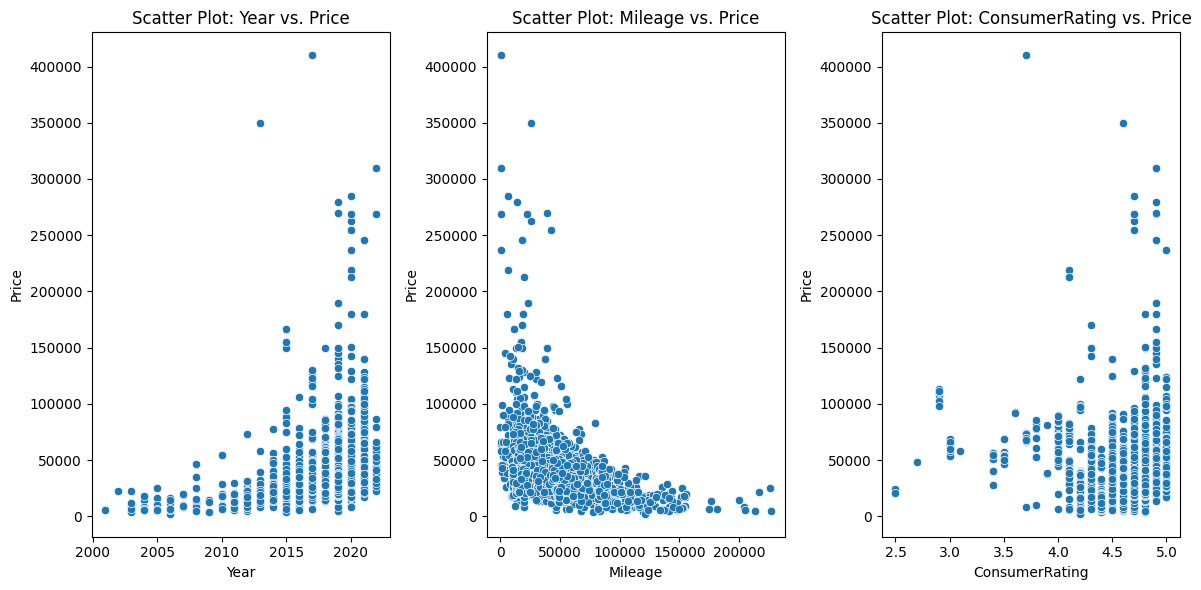

ANOVA F-statistic for car make: 88.40700569201455
ANOVA P-value for car make: 0.0
Kruskal-Wallis H-statistic for car make: 1680.568009802929
Kruskal-Wallis P-value for car make: 0.0
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     306.0
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          2.25e-182
Time:                        22:16:47   Log-Likelihood:                -56580.
No. Observations:                4999   AIC:                         1.132e+05
Df Residuals:                    4995   BIC:                         1.132e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef   

In [29]:
# Import Libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from scipy.stats import f_oneway

# Import CSV file
data = pd.read_csv('cars_raw.csv')

# Perform ANOVA tests for selected categorical variables
f_statistic_make, p_value_make = f_oneway(*[data['Price'][data['Make'] == make] for make in data['Make'].unique()])

# Build a linear regression model for predicting car prices
X = sm.add_constant(data[['Year', 'Mileage', 'ConsumerRating']])
model = sm.OLS(data['Price'], X).fit()

# Create Scatter plot for year vs price
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Price', data=data)
plt.title("Scatter Plot: Year vs. Price")

# Create Scatter Plot for mileage vs. price
plt.subplot(1, 3, 2)
sns.scatterplot(x='Mileage', y='Price', data=data)
plt.title("Scatter Plot: Mileage vs. Price")

# Create Scatter Plot for Consumer Ratings vs. Price
plt.subplot(1, 3, 3)
sns.scatterplot(x='ConsumerRating', y='Price', data=data)
plt.title("Scatter Plot: ConsumerRating vs. Price")
plt.tight_layout()
plt.show()

# Kruskal-Wallis test as a non-parametric alternative to ANOVA
h_statistic, p_value_kruskal = kruskal(*[data['Price'][data['Make'] == make] for make in data['Make'].unique()])

# Interpret ANOVA and Kruskal-Wallis results
print("ANOVA F-statistic for car make:", f_statistic_make)
print("ANOVA P-value for car make:", p_value_make)
print("Kruskal-Wallis H-statistic for car make:", h_statistic)
print("Kruskal-Wallis P-value for car make:", p_value_kruskal)

# Interpret linear regression results
print(model.summary())


Data Analysis: 
    ANOVA f-statistic measures the variance between group means and within group means. It quantifies whether there are statistically significant differences in car prices among different car makes. A higher f-statistic indicates a stronger evidence of differences among groups. The P-value for car make is the p-value associate with the f-statistcs. Due to the F-statistics being at 88.41 and p-value at 0.0, it indicates that the car make has a significant impact on car prices. The Kruskal-Wallis H-statistics is a non-parametric alternative to ANOVA, which tests whether there is a difference to the group. The the higher the h-statistics suggests a stronger evidence of differences among groups. The p-value for Kruskal-Wallis is similar to the ANOVA result. The H-statistic at 1680.57 and p-value of 0.0 indicates strong evidence of differences in car prices among different car makes

    The linear regression results provide information about the relationships between the dependent variable, (Price) and the independent variables, (Year, Mileage, Consumer Rating). The R-squared of 0.155 indicates that the model explains 15.5% of the variance in car prices. The F-statistic of 306.0 and the p-value or Prob(f-statistic) of 2.25e-182 indicates that the overall model is statistically significant, which means at least one of the independent variables is related to the dependent variable. The coefficient represent the estimated relationship between the independent variables and dependent variables. The 'Year' variables suggest that each unit increase in the Year, the price increases by approximately 1738. The p-value associated with the coefficient indicates if the variables is statistically significant. In all the three independent variables all p-values are very low indicating their statical significance. 

Conclusion:
    The ANOVA and Kruskal-Wallis tests suggest significant differences in car prices among different car makes. The linear regression results indicate that the model with Year, Mileage and Consumer Rating as predictors is statistically significant and explains a portion of the variance in car prices. 

